## Importing libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing data

In [3]:
# Defining path
path = r'C:\Users\Rachele\Documents\Data Analytics Course\CareerFoundry\Data Analytics Immersion\Achievement 4\Python'

In [4]:
# Importing combined dataframe
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

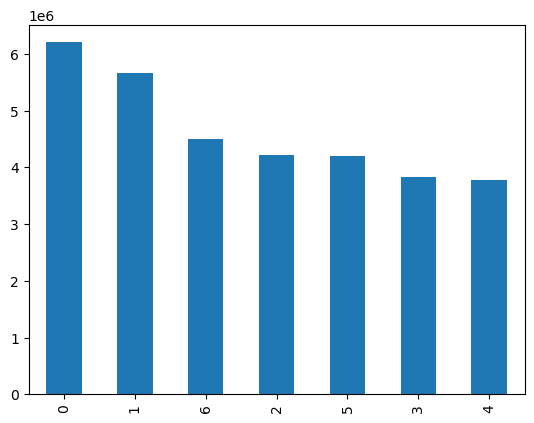

In [5]:
#Created a bar chart
bar = df_combined['orders_day_of_week'].value_counts().plot.bar()

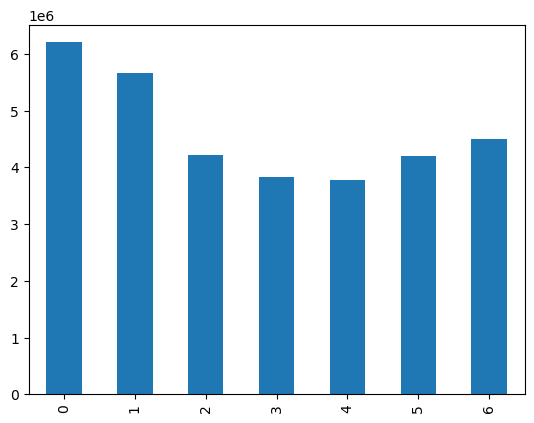

In [6]:
#Sort bar chart
bar = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
#Exported bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_combined.png'))

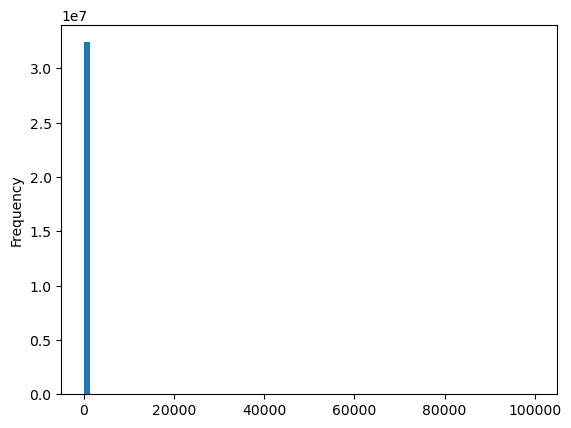

In [8]:
#Created a histogram
hist = df_combined['prices'].plot.hist(bins = 70)

In [9]:
df_combined.loc[df_combined['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,order_frequency_flag,first_name,last_name,gender,State,age,date_joined,Number_of_Dependants,marital_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,21554,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,21554,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,21554,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,33666,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,21554,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,33666,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,33666,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,33666,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,33666,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [10]:
df_combined.loc[df_combined['prices'] >100, 'prices'] = np.nan

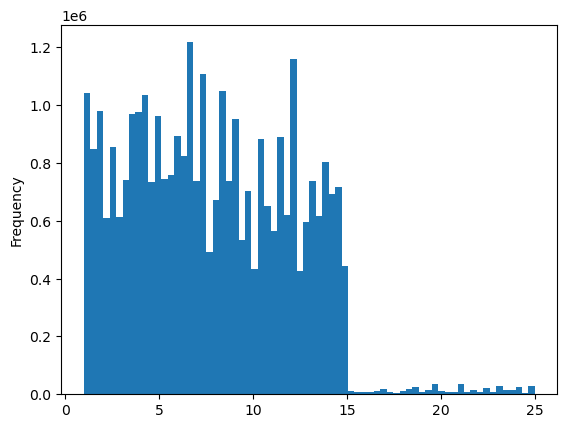

In [11]:
hist_2=df_combined['prices'].plot.hist(bins=70)

In [12]:
#Exported histogram chart as an image
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_combined_70.png'))

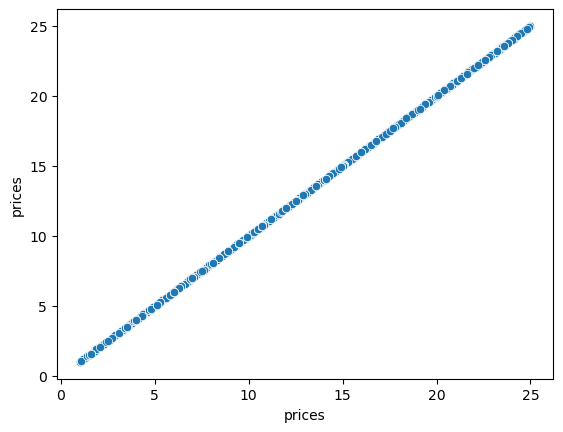

In [13]:
#Created a scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [14]:
#Created a list holding true/false values to test the np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [15]:
#Store 70% of the sample in the dataframe big
big = df_combined[dev]

In [16]:
#Store 30% of the sameple in the datafreame small
small = df_combined[~dev]

In [17]:
# Creates new dataframe where prices and order_day_of_week columns are from the small subset
df_small = small[['orders_day_of_week','prices']]

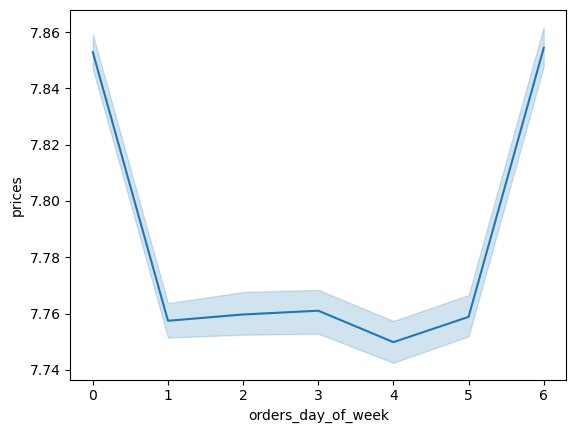

In [18]:
#Created lineplot
lineplot = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [19]:
#Exported the lineplot
lineplot.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_combined.png' ))

### Step 3

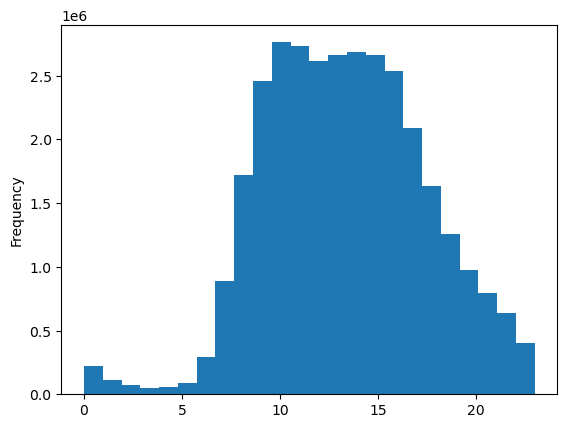

In [20]:
#Created a histogram for 'order_hour_of_day'
hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24)

###by viewing this histogram the peak hours of ordering instacart are approx 9AM to 4 PM and on a steady decline after 5 pm through the night. a small little increase around midnight. but once again low until about 5/6am

In [21]:
#Exported histogram chart as an image
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_hour_combined_24.png'))

### Step 4

In [22]:
#Created a loyalty flag
df_combined['max_order'] = df_combined.groupby(['user_id'])['order_number'].transform(np.max)

In [23]:
df_combined.loc[df_combined['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [24]:
df_combined.loc[(df_combined['max_order'] <= 40) & (df_combined['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [25]:
df_combined.loc[df_combined['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [26]:
df_combined['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

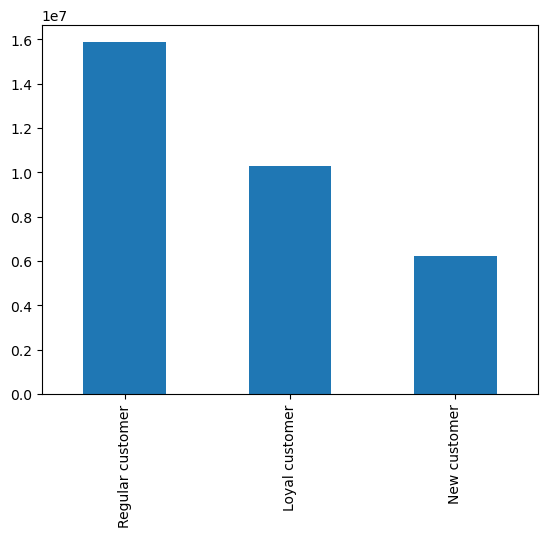

In [27]:
#Created bar chart for loyalty flagb
cust_bar = df_combined['loyalty_flag'].value_counts().plot.bar()

### regular customer are the most relevant

In [28]:
#Exported bar chart
cust_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'cust_loyalty_flag_combined.png' ))

### Step 5

In [29]:
#Created small dataframe for the columns we need and using the small database we already have
df_small2 = small[['prices', 'order_hour_of_day'] ]

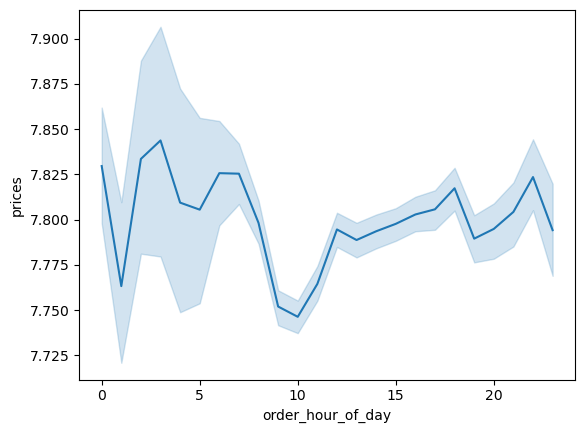

In [30]:
#Created lineplot for above df
line_hour = sns.lineplot(data = df_small2, x = 'order_hour_of_day',y = 'prices')

In [31]:
#Exported the lineplot
line_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'expenditures_hour_combined.png' ))

### Step 6

In [32]:
#Created small dataframe for the columns we need and using the small database we already have
#Checking to see if there is a connection between age & number of dependents
df_small3 = small[['age', 'Number_of_Dependants']]

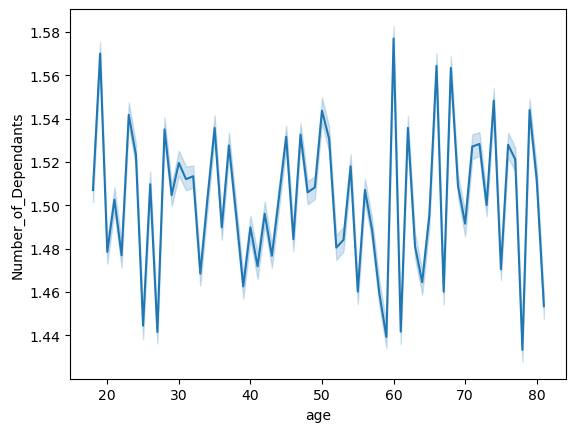

In [33]:
#Created lineplot for above df
line_age = sns.lineplot (data = df_small3, x = 'age', y = 'Number_of_Dependants')

In [34]:
#Exported lineplot
line_age.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'age_dependants_connection_combined.png'))

### Step 7

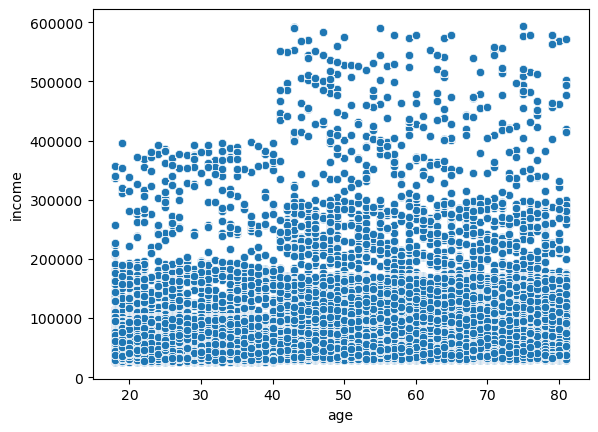

In [35]:
#Created a scatter plot for age & income
scatterplot_income = sns.scatterplot(data = df_combined, x= 'age', y = 'income')

In [37]:
#Export scatter plot
scatterplot_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income_combined'))

In [36]:
#Exported the customer_merged file
df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged_updated.pkl'))